---

## 1. Imports

In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
from sklearn.metrics import root_mean_squared_error

---

## 2. Data collection

In [49]:
ruta = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df = pd.read_csv(ruta)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

## 3. Data exploration

### 3.1 Variables info

- ``age`` -> Age of primary beneficiary (numeric)
- ``sex`` -> Gender of the primary beneficiary (categorical)
- ``bmi`` -> Body mass index (numeric)
- ``children`` -> Number of children/dependents covered by health insurance (numeric)
- ``smoker`` -> Is the person a smoker? (categorical)
- ``region`` -> Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
- ``charges`` -> Health insurance premium (numerical)

In [50]:
print(f"The data frames contain '{df.shape[0]}' rows and '{df.shape[1]}' columns (features)")

The data frames contain '1338' rows and '7' columns (features)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In terms of types of data, we have:

- **3 Categoricals:** sex, smoker, region
- **4 Numericals:** age, bmi, children, charges

In [52]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3.2 Clean data

In [53]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The Data Frame doesn't have NaN

---

## 4. Univariate analysis

### 4.1 Dividing our dataset into categorial and numerical

In [54]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [55]:
num = ["int64", "float64"]
cat = ["O"]

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

In [56]:
df_num.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [57]:
df_cat.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


### 4.2 Categorical Variable Analysis

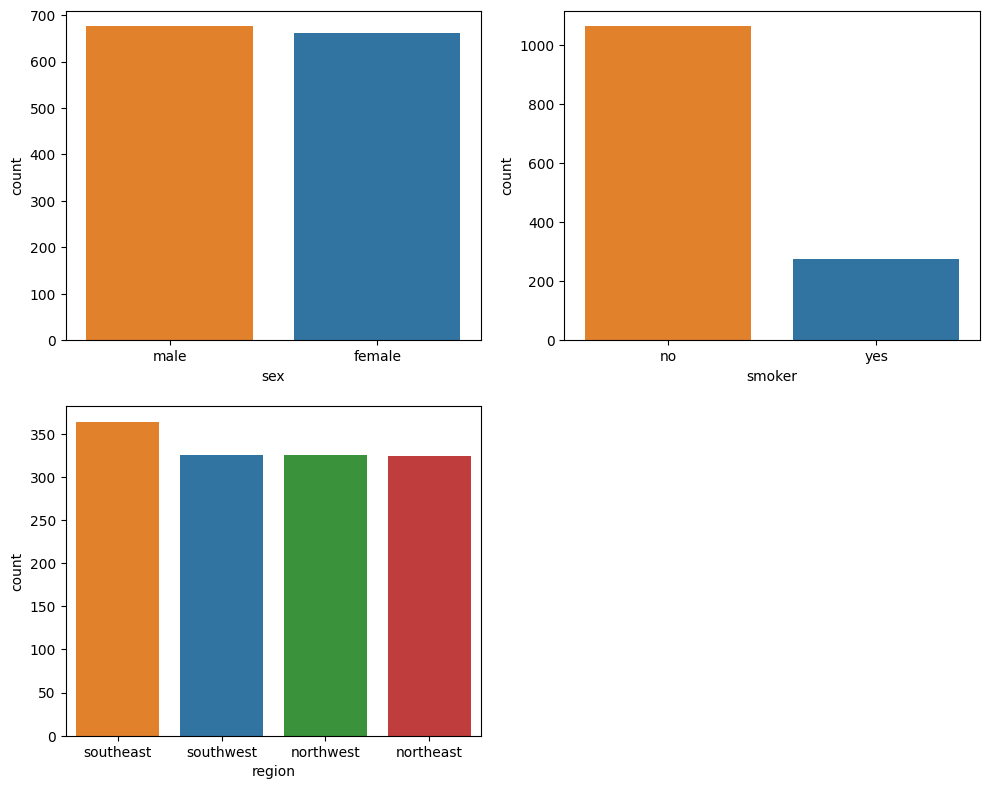

In [58]:
fig, ax = plt.subplots(2,2, figsize = (10,8))

sns.countplot(ax = ax[0,0], data = df_cat, x = "sex", order= df["sex"].value_counts().index, hue=df["sex"])
sns.countplot(ax = ax[0,1], data = df_cat, x = "smoker", order= df["smoker"].value_counts().index, hue=df["smoker"])
sns.countplot(ax = ax[1,0], data = df_cat, x = "region", order= df["region"].value_counts().index, hue=df["region"])
ax[1, 1].remove()

plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()



**Insights**

- ``Gender Distribution:`` The data reveals a relatively even split between males and females.
- ``Smoking Status:`` Most individuals in the dataset are non-smokers, with a smaller fraction identified as smokers.
- ``Regional Distribution:`` The "southeast" region stands out with the highest number of individuals, while the "southwest," "northwest," and "northeast" regions have a fairly similar participant count.







### 4.3 Numerical Variable Analysis

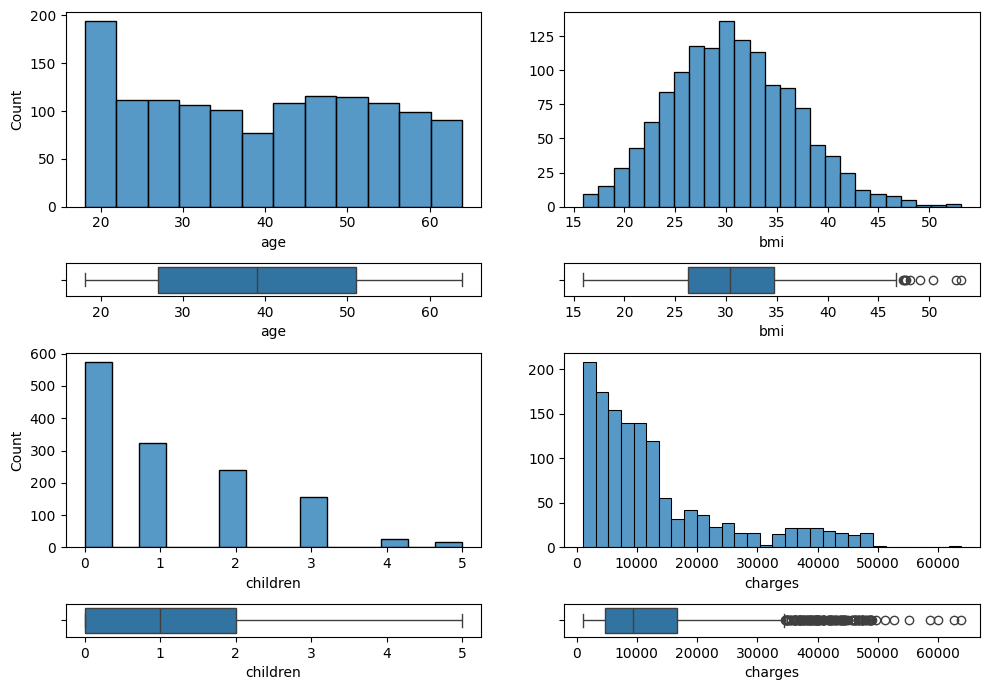

In [59]:
fig, ax = plt.subplots(4, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# age	bmi	children	charges
#First row
sns.histplot(ax = ax[0,0], data=df_num, x="age")
sns.boxplot(ax = ax[1,0], data=df_num, x="age")
sns.histplot(ax = ax[0,1], data=df_num, x="bmi").set(ylabel = None)
sns.boxplot(ax = ax[1,1], data=df_num, x="bmi")

#Second row
sns.histplot(ax = ax[2,0], data=df_num, x="children")
sns.boxplot(ax = ax[3,0], data=df_num, x="children")
sns.histplot(ax = ax[2,1], data=df_num, x="charges").set(ylabel = None)
sns.boxplot(ax = ax[3,1], data=df_num, x="charges")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


**Findings**

- ``Age Distribution:`` The age spread appears relatively uniform, with a noticeable increase in individuals in their early 20s, indicating a larger representation of younger people. The boxplot shows a median age in the mid-30s, with ages broadly distributed and no major outliers, suggesting a well-balanced dataset in terms of age.

- ``BMI Distribution:`` The BMI values exhibit a right-skewed pattern, with most data points clustering between 25 and 35. This suggests that many individuals fall within the overweight to moderately obese categories. The boxplot reveals some outliers above 40, indicating the presence of individuals with severe obesity.

- ``Children Count:`` The majority of participants have no children, with smaller groups having one or two. Families with three or more children are less frequent, and the boxplot shows that cases with four or five children are outliers, suggesting that larger families are uncommon.

- ``Charges Distribution:`` The distribution of medical charges is highly skewed to the right, meaning most people have relatively low expenses, but a few incur exceptionally high charges. These outliers, as shown in the boxplot, likely represent individuals with significant medical needs or high insurance costs.

---

## 5. Multivariate Analysis


### 5.1 Encoding Categorical Values and Saving JSON files

In [60]:
df_enc = df.copy()

In [61]:
encoders = {}

for column in df_cat.columns:
    unique_values = list(df_cat[column].unique())
    
    encoders[column] = dict(zip(unique_values, range(len(unique_values))))
    
    json.dump(encoders[column], open(f'../data/interim/enc_{column}.json', 'w'))

In [62]:
for column in df_cat.columns:
    df_enc[column] = df_enc[column].map(json.load(open(f'../data/interim/enc_{column}.json')))

In [63]:
df_enc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Encoded data:

-``region:`` {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}

-``sex:`` {"female": 0, "male": 1}

-``smoker:`` {"yes": 0, "no": 1}

### 5.2 Numerical - Categorical Analysis

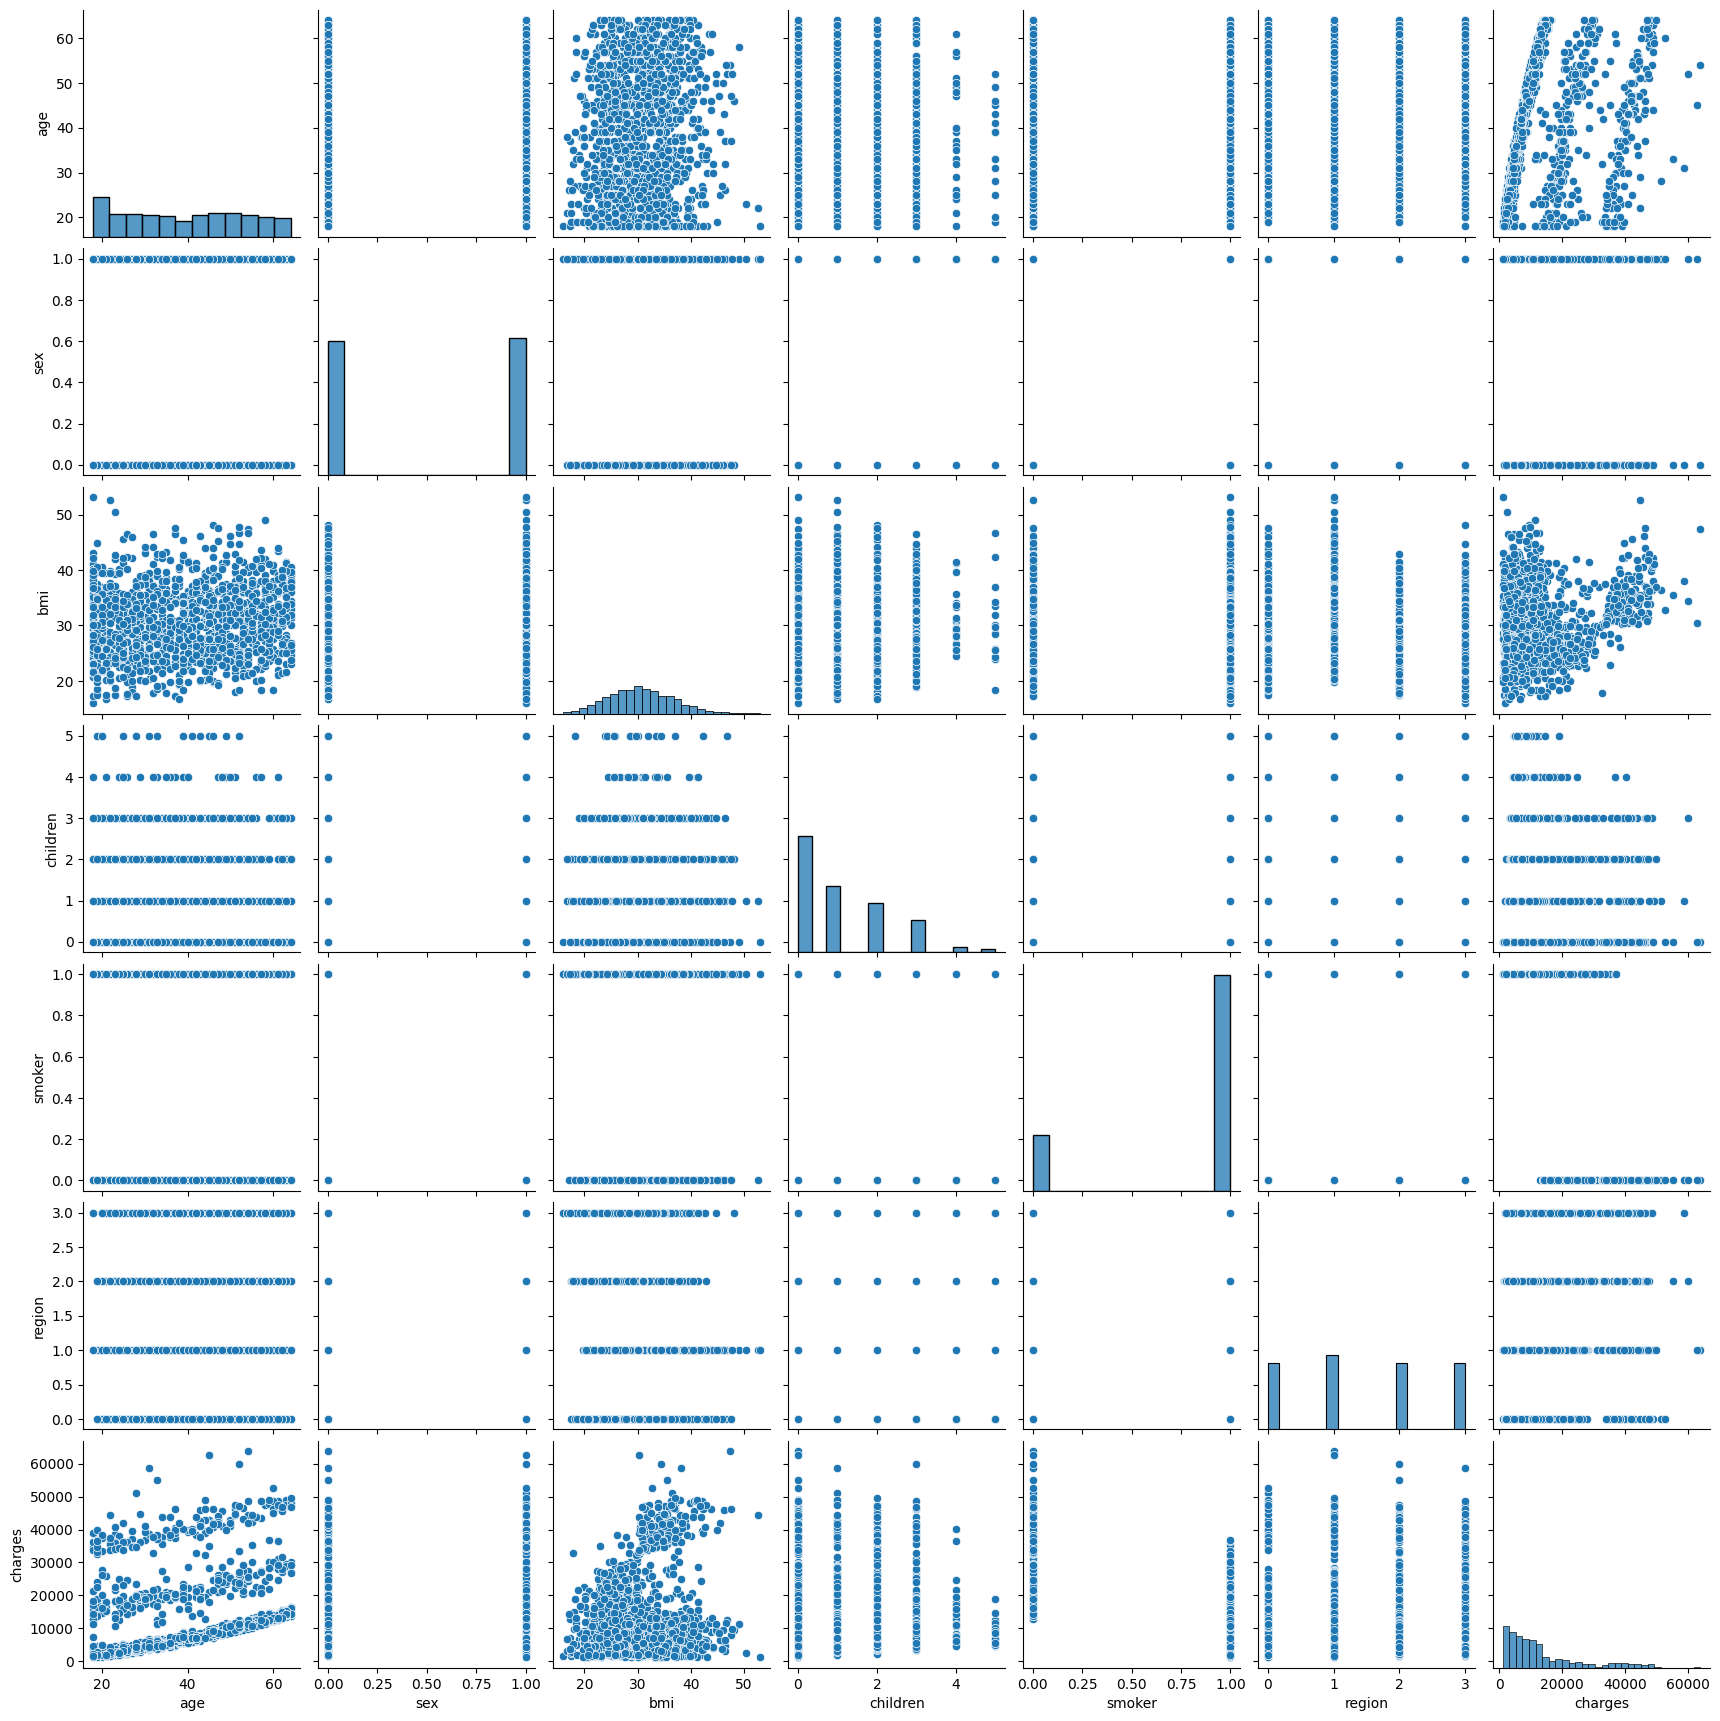

In [64]:
sns.pairplot(data = df_enc)
plt.show()

<Axes: >

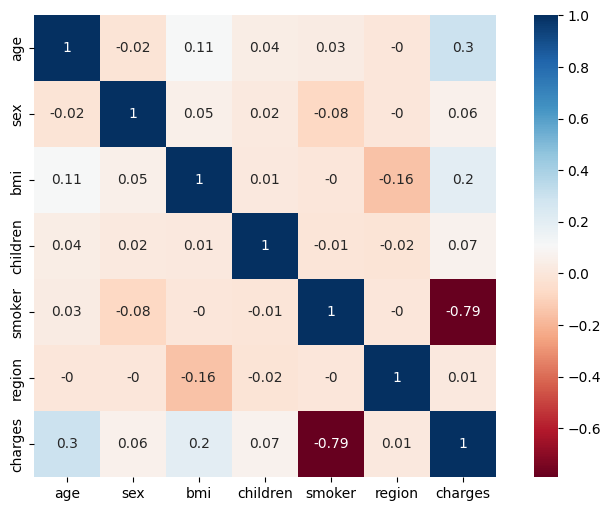

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_enc.corr().round(2), annot=True, square= True, cmap="RdBu")

**Conclusion**

- ``smoker and charges:`` There is a strong negative correlation (-0.79), suggesting that non-smokers tend to have lower costs (or vice versa).

- ``age and charges:`` There is a moderate positive correlation (+0.3), indicating that as age increases, costs also tend to rise.

- ``bmi and charges:`` There is a low positive correlation (+0.2), which may indicate a slight relationship between body mass index and costs.

---

## 6. Feature Engineering

### 6.1 Outliers Analysis

In [66]:
df_enc.describe().round(2)

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00,1338.00
mean,39.21,0.51,30.66,1.09,0.8,1.48,13270.42
std,14.05,0.50,6.10,1.21,0.4,1.10,12110.01
min,18.00,0.00,15.96,0.00,0.0,0.00,1121.87
25%,27.00,0.00,26.30,0.00,1.0,1.00,4740.29
50%,39.00,1.00,30.40,1.00,1.0,1.00,9382.03
75%,51.00,1.00,34.69,2.00,1.0,2.00,16639.91
max,64.00,1.00,53.13,5.00,1.0,3.00,63770.43


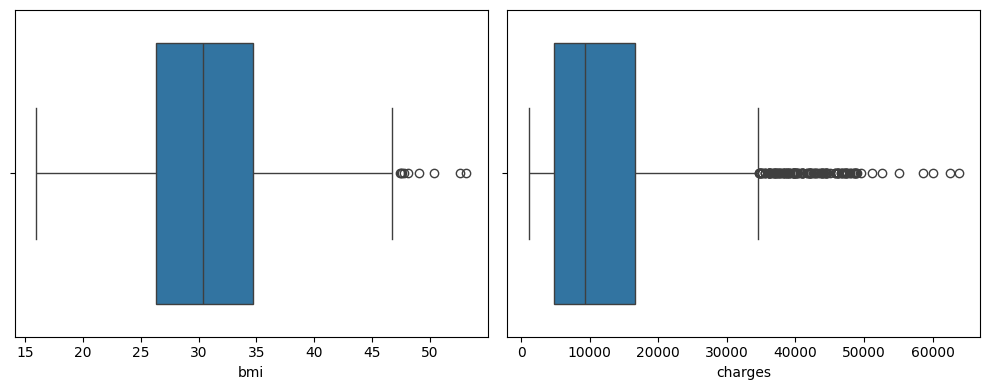

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.boxplot(ax = ax[0], data = df_enc, x = "bmi")
sns.boxplot(ax = ax[1], data = df_enc, x = "charges")

plt.tight_layout()
plt.show()

**Conclusions**

- ``bmi:`` There are some outliers above 40-50. These represent individuals with a very high body mass index (possibly severe obesity).

- ``charges:`` There is a large number of outliers above 30,000, reaching up to 60,000. This indicates that a small group of people has exceptionally high medical costs. This behavior could be related to factors such as smoking, chronic illnesses, or expensive medical treatments.

### 6.2 Remove Outliers

In [68]:
df_enc_no = df_enc.copy()

In [69]:
def remove_outliers(x, feature_name, allow_neg = True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr * 1.5)
    lower_lim = q1 - (iqr * 1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [70]:
list_outliers = ["bmi", "charges"]

for feature in list_outliers:
    df_enc_no[feature] = remove_outliers(x=df_enc_no[feature],feature_name=feature, allow_neg=False)

In [71]:
df_enc_no.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.9240
1,18,1,33.77,1,1,1,1725.5523
2,28,1,33.00,3,1,1,4449.4620


### 6.3 Missing Values

In [72]:
df_enc.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
df_enc_no.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---

## 7. Split train/test

In [74]:
def split(target, df, test_size = 0.2, random_state = 1919):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [75]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('charges', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('charges', df_enc_no)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [76]:
X_test_with_outliers

,age,sex,bmi,children,smoker,region
241,33,0,22.135,1,1,3
112,37,1,30.800,0,1,0
481,49,1,37.510,2,1,1
492,18,0,25.080,0,1,3
1048,25,0,22.515,1,1,2
...,...,...,...,...,...,...
1255,42,0,37.900,0,1,0
483,51,0,39.500,1,1,0
410,19,1,17.480,0,1,2
1300,45,1,30.360,0,0,1


---

## 8. Normalization

In [77]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/processed/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [78]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

---

## 9. Min-Max Scaling

In [79]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/processed/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [80]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

---

## 10. Feature Selection

In [81]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train, y_train)
    cols = selector.get_support()

    X_train_sel = pd.DataFrame(selector.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selector.transform(X_test), columns=X_test.columns.values[cols])

    dump(selector, open(f'../data/processed/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel 

In [82]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 'all', 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 'all', 'without_outliers')

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


### 10.1 Applying the columns filter (kselection) to the normalized and minmax scaled data frames

In [83]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

### 10.2 Saving the CSV files

In [84]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

---

## 11. Machine Learning

### 11.1 Decision making: Wich is the best dataset?

In [85]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

In [86]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [87]:
results = []

for index in range(len(train)):
    model = LinearRegression()
    train_df = train[index]
    model.fit(train_df, y_train)
    y_test_pred = model.predict(test[index])

    results.append(
        {
            'index': index,
            'df_train': list(dfs_train.keys())[index],
            'Coef': model.coef_,
            'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
            'RMSE': round(root_mean_squared_error(y_test, y_test_pred),2),
            "R2_score": round(r2_score(y_test, y_test_pred),5)            
        }
    )

results = sorted(results, key=lambda x: x['RMSE'])
best_ind = results[0]['index']
best_df_train = results[0]['df_train']
results

[{'index': 1,
  'df_train': 'X_train_without_outliers_sel',
  'Coef': array([   242.76937889,     47.35747426,    359.48070945,    576.20459851,
         -23723.24996147,    406.23917469]),
  'MAE': np.float64(4187.88),
  'RMSE': np.float64(6208.64),
  'R2_score': 0.74694},
 {'index': 3,
  'df_train': 'X_train_without_outliers_norm_sel',
  'Coef': array([ 3386.11171964,    23.67608969,  2196.02731262,   692.76725069,
         -9587.6287808 ,   450.42536839]),
  'MAE': np.float64(4187.88),
  'RMSE': np.float64(6208.64),
  'R2_score': 0.74694},
 {'index': 5,
  'df_train': 'X_train_without_outliers_minmax_sel',
  'Coef': array([ 11167.39142889,     47.35747426,  11262.5306271 ,   2881.02299255,
         -23723.24996147,   1218.71752406]),
  'MAE': np.float64(4187.88),
  'RMSE': np.float64(6208.64),
  'R2_score': 0.74694},
 {'index': 0,
  'df_train': 'X_train_with_outliers_sel',
  'Coef': array([   243.15152075,     41.39002597,    356.95026554,    578.0609643 ,
         -23718.05112245,  

In [88]:
results[results[0].get("index")].get('MAE')

np.float64(4187.88)

In [89]:
print(f'Our best dataframe for our model is {best_df_train}, with a MAE of {results[results[0].get("index")].get("MAE")}, \
a RMSE of {results[results[0].get("index")].get("RMSE")} and a R2_score of {results[results[0].get("index")].get("R2_score")}')

Our best dataframe for our model is X_train_without_outliers_sel, with a MAE of 4187.88, a RMSE of 6208.64 and a R2_score of 0.74694
